# **DEVELOPING A PREDICTIVE MODEL FOR EARLY DETECTION OF MENTAL HEALTH CONDITIONS** 

**DISCLAIMER: Upon use of this model  seek further consultation with a certified healthcare professional in your area**

---
**Authors:**

1. Elvis Wanjohi (Team Leader)

2. Jessica Gichimu

3. Jesse Ngugi

4. Stephen Gachingu

5. Latifa Riziki

---

## **1. Business Understanding**   

### 1.1 Business Overview
Given the fast-moving pace of economic and technological advancement in today’s world, most people, especially from the younger generation, tend to experience some form of mental health issues in their lifetime. There has been a significant increase in individuals experiencing suicidal ideation. While it may appear that such individuals do not explicitly communicate their distress, a closer examination of their online activity, such as social media posts, comments, and engagement patterns, often reveals underlying emotional states indicative of psychological distress. This could help researchers, students, and practitioners to develop early detection models for mental health support. The goal is to encourage data-driven approaches to mental health awareness, prevention, and support systems. Mental health awareness is primarily in the healthcare and psychology domains, focusing on the assessment, diagnosis, and treatment of mental health conditions. 

The target audience for this NLP model are health care professionals (such as therapists, psychologists, psychiatrists), and mental health organizations and clinics, where they can prioritize high-risk cases, or monitor trends in mental health conditions across populations. This model could be used to identify early symptoms of the mental health of individuals in our society. We were able to find a brief description of mental health in the Practical Natural Language Processing( A Comprehensive Guide to Building Real-World NLP Systems) book, which gave us the idea of tackling this project. The motivation for the project is try and improve the diagnosis  and treatment of mental health by identifying underlying conditions at an early stage.



---

### 1.2 Problem Statement

Mental health professionals often rely on their experience, degrees and studies to make a diagnosis on the mental health of an individual. We are trying to build a tool that can coexist with their expertise in this field in order to accurately classify individuals with mental health conditions.Mental health care professionals can use statements made by patients  and use our model to analyse the words used and classify the mental health of the patient. This model is meant to work along with the knowledge that our capable health care professionals have, it should be used cautiously to ensure there is minimal or no misdiagnosis. This model will also be available to the public for anyone who would like a quick self assessment should they  portray signs of a mental breakdown, but they should ensure to do further consultation with their mental health care provider.

Mental health professionals often rely on personal expertise and manual assessment to diagnose patients—an approach that is time-intensive and difficult to scale. In many cases, warning signs are missed or detected late, especially when individuals express themselves informally online.

This project proposes an NLP-based predictive model that analyzes text statements and classifies potential mental-health conditions. By integrating automated linguistic analysis with professional oversight, the model can complement human judgment, enabling faster, broader screening. The tool is also designed for public awareness and self-assessment purposes, with a clear ethical guideline that professional consultation must accompany any automated insights.

---

### 1.3 Business Objective

#### 1.3.1 Main Objective 

The main objective is to develop a machine learning model that can accurately classify mental health conditions based on textual statements expressed by individuals.


#### 1.3.2 Specific Objectives

The specific objectives of the project are:
 
1. Translate all text data into Swahili to localize the dataset and improve inclusivity.

2. Identify the most common mental health condition.

3. Preprocess the data through processes such as Vectorization and tokenization, handling missing values, and creating new features such as characters, words and sentences.

4. Use exploratory tools such as word clouds to visualize commonly terms associated with specific mental health categories.

5. Analyze text length to classify a mental health condition or show correlation  with a mental health condition. 

6. Evaluate model performance using metrics such as Precision, Recall, F1score, Accuracy Score and ROC-AUC.

7. Compare different classification models to determine which performs best for this dataset.

8. Scrapping data from an online platform like twitter to show the efficiency of the model.

9. Create a translate feature to allow English–Swahili switching for interpretability and diversity in the model.


#### 1.3.3 Research Questions

1. Can the dataset be effectively translated and localized to Swahili?

2. Which is the most common health condition?

3. Which features influence mental health condition?

4. Which words are specific to each mental health category?

5. Which classifier model achieves the best Precision, Recall, F1 score, Accuracy and ROC-AUC?

6. Which classification model performs best for this dataset?

7. How efficiently can the model classify conditions when applied to Twitter data?

8. How can we ensure diversity, fairness and interpretability in the multilingual model?


---

### 1.5 Success Criteria  

The success of this project will be assessed in the following ways:

1. The analysis should generate actionable insights into the most common mental health conditions to inform better prevention and support strategies.

2. A machine learning model should successfully classify text into relevant mental health categories with high performance metrics.

3. The final system should maintain interpretability, cultural sensitivity and ethical integrity when applied to both English and Swahili datasets.

 
---


## 2. Data Understanding

This section introduces the Swahili-translated mental health text dataset used for building a condition classification model. The dataset contains user statements translated from English to Swahili, serving as the foundation for downstream Natural Language Processing (NLP) modeling in an African context.

The aim is to understand the dataset’s structure and content. This includes reviewing the available features, verifying data types and identifying potential quality issues such as missing values, duplicates or inconsistencies.

By exploring the data at this stage, it is possible to detect quality concerns and inform decisions for text cleaning, data preprocessing and subsequent model development.

### 2.1 Importing Required Libraries

The necessary Python libraries for data handling, visualization, text preprocessing and modeling are imported. These include Pandas, NumPy, Seaborn, Matplotlib, Plotly, Scikit-learn, Imbalanced-learn, NLTK and Regex for text analysis and machine learning.

In [4]:
# Import required libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Text preprocessing and NLP
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.colors as pc
from IPython.display import Image, display

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack, csr_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Model interpretation and saving
import lime
import lime.lime_text
import joblib
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

### 2.2. Data Loading and Inspection

In this section, the translated Swahili mental health dataset is loaded from a CSV file into a Pandas DataFrame. Basic inspection functions are applied to confirm successful loading and to preview the structure of the dataset before further analysis.

In [6]:
# Load the dataset
data = pd.read_csv("translated_dataset.csv")

# Display the first few rows of the dataset
data.head()

,text,status,text_sw
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi..."
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak..."
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha..."
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka..."


Each row in the dataset represents a user statement translated into Swahili for localized model training. The dataset contains the following columns:

- text: The original English statement describing a mental health condition or experience.

- status: The labeled mental health category or condition.

- text_sw: The Swahili translation of the English statement, making the dataset more inclusive and relevant for mental health analysis within the African context.

This information provides the foundation for analyzing text patterns across different mental health conditions and for developing an effective multilingual classification model.

In [8]:
# Check the shape of the dataset
data.shape

(103488, 3)

- The dataset has 103,488 rows and 3 columns.

In [10]:
# Display data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103488 entries, 0 to 103487
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     103481 non-null  object
 1   status   103488 non-null  object
 2   text_sw  103481 non-null  object
dtypes: object(3)
memory usage: 2.4+ MB


- The dataset contains three columns: text, status and text_sw.

- Almost all rows are complete with only a few missing entries in text and text_sw.

- All columns are of object data type, indicating that they store text-based information.

- This confirms that the dataset is suitable for text-based preprocessing and further natural language processing tasks.

In order to understand the columns better, and for ease of readability, the columns are renamed to give the data more meaning.

In [13]:
# Rename the columns for clarity
def rename_columns(df):
    df.columns = ['english_text', 'mental_health_label', 'swahili_text']
    return df

data = rename_columns(data)
data.head()

,english_text,mental_health_label,swahili_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi..."
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak..."
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha..."
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka..."


- Each row now represents a unique text sample with its corresponding mental health label in English and its Swahili translation.

In the mental_health_label column, it is possible to check the different classes (mental health conditions) and their respective counts.

In [16]:
# Check the distribution of mental health labels
data['mental_health_label'].value_counts()

mental_health_label
anxiety                 17620
normal                  16068
depression              15901
stress                  15230
personality disorder    13915
bipolar                 13708
suicidal                11046
Name: count, dtype: int64

- The dataset contains seven mental health categories: anxiety, normal, depression, stress, personality disorder, bipolar and suicidal.

- This distribution shows a fairly balanced representation of the various mental health conditions.

- Such balance supports effective model training and helps ensure consistent performance across categories.

Next, missing values and duplicate values are checked in the dataset.

In [19]:
# Check for missing values
missing_values = data.isna().sum()
missing_values

english_text           7
mental_health_label    0
swahili_text           7
dtype: int64

- The english_text column has 7 missing values.

- The swahili_text column contains 7 missing values.

- These rows were dropped to ensure that each record contains both language versions for consistency.

- The mental_health_label column has no missing values, meaning all remaining entries have valid category labels.

In [21]:
# Drop missing values in 'english_text' and 'swahili_text' columns
data.dropna(subset=['english_text', 'swahili_text'], inplace=True)

# Check again to confirm all missing values are removed
data.isna().sum()

english_text           0
mental_health_label    0
swahili_text           0
dtype: int64

- The dataset no longer contains any missing values.

Next, duplicate rows in the dataset are checked.

In [24]:
# Check for duplicate values
data.duplicated().sum()

0

- No duplicate records were found in the dataset.

- This confirms that all entries are unique and that there is no redundancy that could bias the model or affect analysis results.

Next, the summary statistics of the data are checked.

In [27]:
data.describe()

,english_text,mental_health_label,swahili_text
count,103481,103481,103481
unique,103460,7,100263
top,i'm tired and i want to die can someone give m...,anxiety,Aandika ujumbe unaoonesha hisia - moyo zinazot...
freq,2,17620,169


- The summary statistics show that each column contains over 103,000 records.

- All text fields (english_text and swahili_text) have a high number of unique entries confirming that most sentences are distinct.

- The mental_health_label column contains 7 unique categories. This shows a diverse range of mental health conditions represented in the dataset.

### 2.3. Exploratory Data Analysis

This section investigates the dataset to get key insights, evaluate feature distributions, assess relationships and detect any issues or outliers. The findings will guide the selection of appropriate preprocessing and modeling techniques.

#### 2.3.1. Dataset Overview

This section covers the general overview of the dataset. This includes the shape, number of tweets, number of features and column info.

In [31]:
# Dataset overview
print("Dataset Overview")
print(f"Dataset shape: {data.shape}")
print(f"Number of tweets: {len(data)}")
print(f"Number of features: {len(data.columns)}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn Information:")
for col in data.columns:
    print(f"• {col}: {data[col].dtype}")

Dataset Overview
Dataset shape: (103481, 3)
Number of tweets: 103481
Number of features: 3
Memory usage: 87.66 MB

Column Information:
• english_text: object
• mental_health_label: object
• swahili_text: object


#### 2.3.2 Mental Health Label Distribution Analysis

In this section, the distribution of the unique values in the mental_health_label column is inspected.

In [33]:
# Mental Health Label Distribution Analysis
print("Mental Health Label Distribution Analysis")

# Count unique label values
label_counts = data['mental_health_label'].value_counts()
print("\nLabel Categories:")
print(label_counts)

# Calculate percentages
label_percentages = data['mental_health_label'].value_counts(normalize=True) * 100
print("\nLabel Distribution (%):")
print(label_percentages.round(2))

Mental Health Label Distribution Analysis

Label Categories:
mental_health_label
anxiety                 17620
normal                  16067
depression              15900
stress                  15229
personality disorder    13912
bipolar                 13708
suicidal                11045
Name: count, dtype: int64

Label Distribution (%):
mental_health_label
anxiety                 17.03
normal                  15.53
depression              15.37
stress                  14.72
personality disorder    13.44
bipolar                 13.25
suicidal                10.67
Name: proportion, dtype: float64


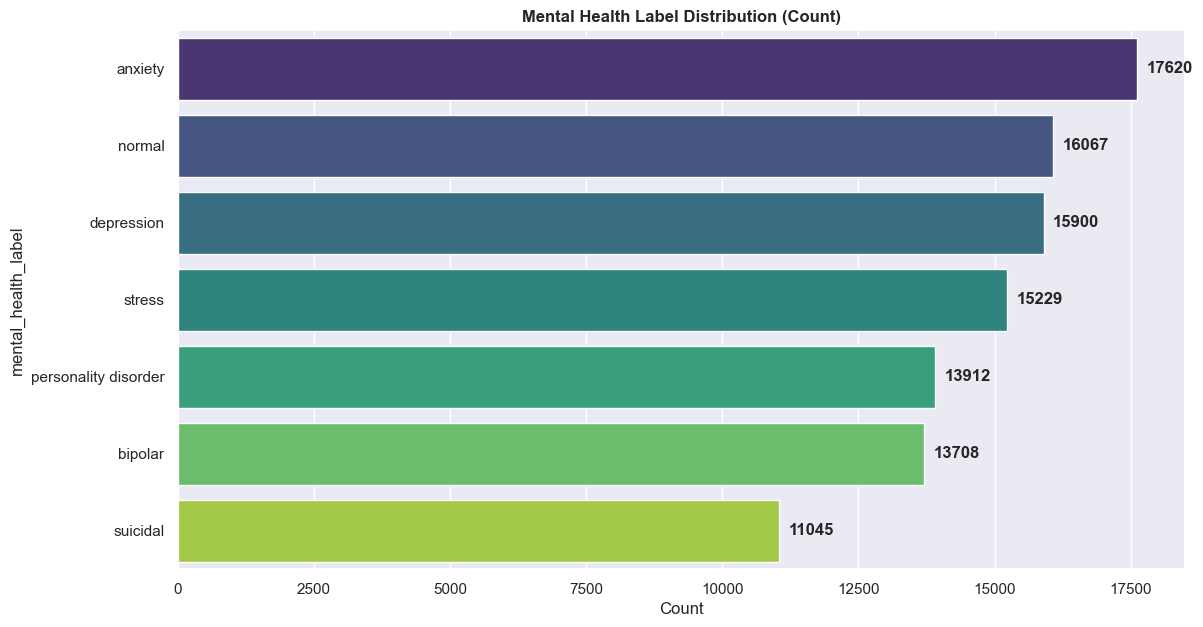

In [34]:
# Plot 1: Mental Health Label Distribution

# Visualize label distribution
plt.figure(figsize=(13,7))
ax = sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
plt.title('Mental Health Label Distribution (Count)', fontsize=12, fontweight='bold')
plt.xlabel('Count'); plt.ylabel('mental_health_label')

# Annotate counts
for i, v in enumerate(label_counts.values):
    ax.text(v + label_counts.max()*0.01, i, str(v), va='center', fontweight='bold')

plt.show()

From the plot, the following key observations were made:

- Out of the total records in the dataset, anxiety is the most frequent mental health condition with 17,620 entries, followed by normal with 16,067, depression with 15,900 and stress with 15,229.

- The least represented categories are bipolar with 13,708, personality disorder with 13,912 and suicidal with 11,045.

- This shows that the dataset is not evenly distributed across classes, with certain conditions appearing more frequently.

- Such class imbalance can bias the model toward majority classes like anxiety or normal, reducing predictive performance on minority classes.

- Therefore, techniques such as resampling or class-weight adjustment will be applied before modeling to mitigate this imbalance.

#### 2.3.3 Text Length Distribution Analysis

This section examines the distribution of text lengths in the dataset to understand variation across both English and Swahili entries. The analysis helps identify whether most posts are short or long, which influences preprocessing and model selection decisions.

In [37]:
# Calculate text lengths
data['english_length'] = data['english_text'].apply(lambda x: len(str(x).split()))
data['swahili_length'] = data['swahili_text'].apply(lambda x: len(str(x).split()))

# Display basic statistics
print("English Text Length Summary:\n", data['english_length'].describe())
print("\nSwahili Text Length Summary:\n", data['swahili_length'].describe())

English Text Length Summary:
 count    103481.000000
mean         82.022671
std         127.867387
min           1.000000
25%          24.000000
50%          34.000000
75%          99.000000
max        5419.000000
Name: english_length, dtype: float64

Swahili Text Length Summary:
 count    103481.000000
mean         28.871919
std          21.893527
min           1.000000
25%          16.000000
50%          24.000000
75%          34.000000
max         499.000000
Name: swahili_length, dtype: float64


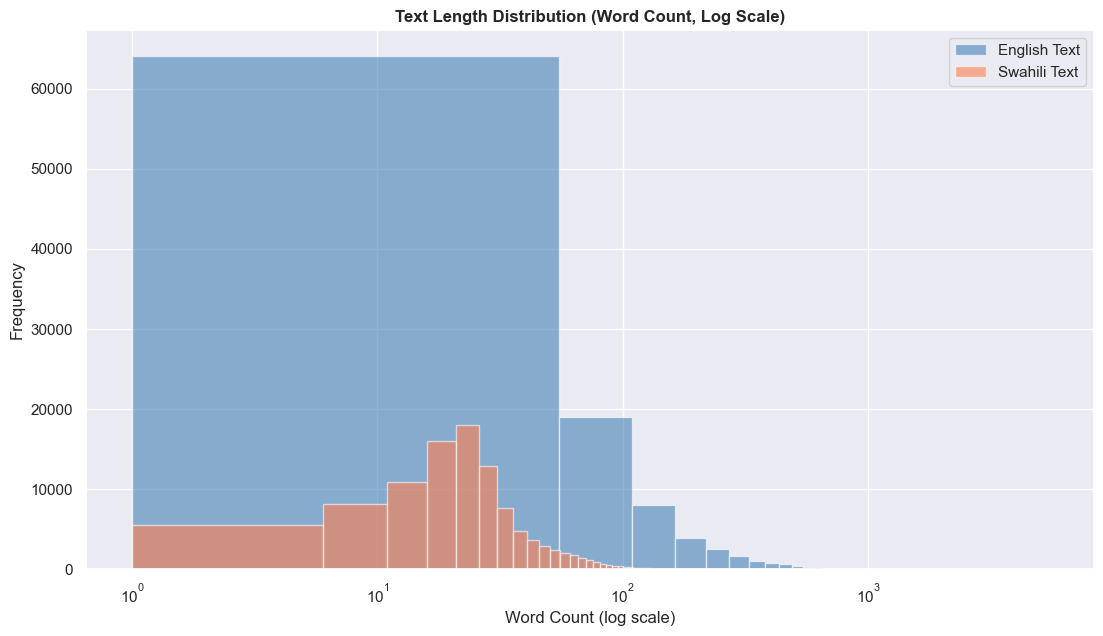

In [38]:
# Plot 2: Text Length Distribution

# Visualize text length distribution
plt.figure(figsize=(13,7))
plt.hist(data['english_length'], bins=100, alpha=0.6, label='English Text', color='steelblue')
plt.hist(data['swahili_length'], bins=100, alpha=0.6, label='Swahili Text', color='coral')
plt.xscale('log')
plt.title('Text Length Distribution (Word Count, Log Scale)', fontsize=12, fontweight='bold')
plt.xlabel('Word Count (log scale)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From the plot, the following were the key observations:

- The histogram shows that most entries in both English and Swahili texts contain fewer than 50 words. This shows that the majority of posts are concise.

- English texts generally have a wider spread and higher average word count at about 82 words, while Swahili texts cluster more tightly around the lower range at about 29 words.

- The use of a log-scaled x-axis helps reveal the long-tail distribution caused by a few extremely long messages extending beyond several thousand words.

- This right skewed distribution suggests that most text data is short-form while only a small fraction is lengthy and detailed.

- These findings will inform text preprocessing decisions such as determining appropriate sequence lengths, truncation thresholds and tokenization strategies during model training.

#### 2.3.4. Text Length by Mental Health Label

This section examines how the word count of posts varies across different mental health labels. Analyzing text length helps to understand writing patterns across conditions and informs preprocessing steps such as sequence length selection and truncation during model training.

The analysis helps to:

- Compare the average text length between mental health labels.

- Identify whether certain conditions are associated with longer or shorter posts.

- Provide preprocessing insights for model optimization.

This step gives a clear view of how expressive or concise users tend to be when describing different mental health experiences.

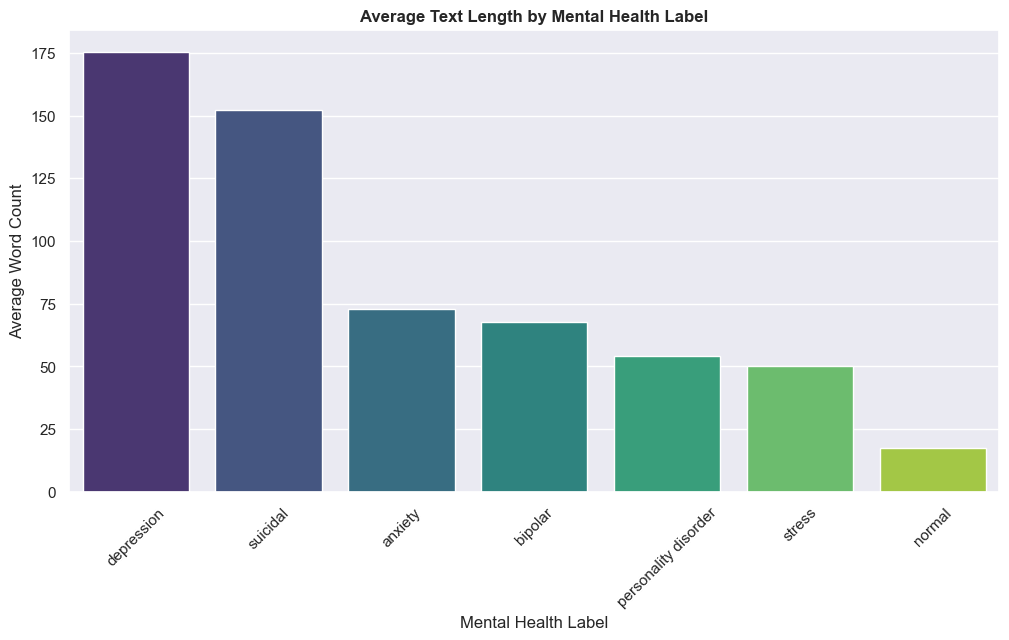

In [41]:
# Plot 3: Average Text Length by Mental Health Label

# Prepare data
length_data = data[['mental_health_label', 'english_length']]

# Calculate average length per label
avg_length = length_data.groupby('mental_health_label')['english_length'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_length.index, y=avg_length.values, palette='viridis')
plt.title('Average Text Length by Mental Health Label', fontsize=12, fontweight='bold')
plt.xlabel('Mental Health Label')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.show()


The following were the key observations:

- Depression has the highest average word count at about 175 words per post. This shows detailed and expressive messages.

- Suicidal posts follow closely with about 152 words suggesting longer and emotionally charged expressions.

- Anxiety and Bipolar posts have moderate lengths of about 72 words and about 67 words respectively.

- Personality Disorder and Stress are shorter on average at about 53 words and about 50 words.

- Normal posts are the shortest averaging only about 30 words.

- These findings show that users expressing depressive or suicidal thoughts tend to write longer and more descriptive messages. Posts about stress or normal states are concise.

#### 2.3.6 Distribution of Text length/Character, Word and Sentence Counts

This section examines the basic linguistic structure of the dataset by analyzing the distribution of character, word, and sentence counts across both the English and Swahili text columns. Understanding these linguistic features helps reveal how post length and complexity vary between languages and across the different mental_health_label categories.

New quantitative features are generated for each language column to measure structural properties of the text. Examining these features helps to:

- Identify patterns in text length and complexity across the mental_health_label classes.

- Detect whether certain labels such as those expressing mental health distress tend to contain shorter and more direct posts or longer and more descriptive ones.

- Show potential data quality issues. This could include empty or unusually long posts that may have resulted from translation or text processing inconsistencies.

- Reveal feature engineering opportunities that can improve model performance, such as managing very long posts and creating simple measures of text detail like average words per sentence.

These analyses provide a detailed overview of the dataset’s linguistic characteristics in both languages. This supports more effective preprocessing and model development.

In [44]:
# Feature Engineering: English Text
def generate_english_features(df):
    df['english_word_count'] = df['english_text'].apply(lambda x: len(nltk.word_tokenize(str(x))))
    df['english_sentence_count'] = df['english_text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
    df['english_char_count'] = df['english_text'].apply(lambda x: len(str(x)))
    return df

data = generate_english_features(data)
data[['english_text', 'english_word_count', 'english_sentence_count', 'english_char_count']].head()

,english_text,english_word_count,english_sentence_count,english_char_count
0,"""My mind is a never-ending cycle of worry, and...",123,6,518
1,Despite the sun shining and birds singing outs...,51,2,274
2,"I'm drowning in responsibilities, each one dem...",35,1,167
3,"""My emotions shift like the wind, leaving me u...",38,2,177
4,"I'm trapped in a whirlwind of thoughts, unable...",31,1,161


In [45]:
# Feature Engineering: Swahili Text
def generate_swahili_features(df):
    df['swahili_word_count'] = df['swahili_text'].apply(lambda x: len(nltk.word_tokenize(str(x))))
    df['swahili_sentence_count'] = df['swahili_text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))
    df['swahili_char_count'] = df['swahili_text'].apply(lambda x: len(str(x)))
    return df

data = generate_swahili_features(data)
data[['swahili_text', 'swahili_word_count', 'swahili_sentence_count', 'swahili_char_count']].head()

,swahili_text,swahili_word_count,swahili_sentence_count,swahili_char_count
0,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",44,2,231
1,Licha ya jua kung'aa na ndege wakiimba nje ya ...,26,1,141
2,"Mimi ninalemewa na madaraka, kila mmoja akitak...",30,1,176
3,"""Hisia zangu hubadilika kama upepo, zikiniacha...",36,2,207
4,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",28,1,166


In [46]:
# Combine and Preview Both Language Features
cols_to_display = [
    'mental_health_label',
    'english_word_count', 'english_sentence_count', 'english_char_count',
    'swahili_word_count', 'swahili_sentence_count', 'swahili_char_count'
]

data[cols_to_display].head(10)

,mental_health_label,english_word_count,english_sentence_count,english_char_count,swahili_word_count,swahili_sentence_count,swahili_char_count
0,anxiety,123,6,518,44,2,231
1,bipolar,51,2,274,26,1,141
2,stress,35,1,167,30,1,176
3,personality disorder,38,2,177,36,2,207
4,anxiety,31,1,161,28,1,166
5,bipolar,29,1,155,25,1,126
6,stress,38,2,172,34,1,185
7,personality disorder,43,3,156,27,2,125
8,anxiety,35,2,166,32,2,157
9,bipolar,50,3,251,35,2,187


- New text based features were successfully generated for both English and Swahili columns to show the structural properties of each post. These include word count, sentence count and character count. The features allow for a quantitative understanding of post length and complexity across the different mental health categories.

- From the preview, English and Swahili posts display comparable patterns in length. However, English entries tend to have slightly higher word and character counts on average. This may show differences in language structure or expression style after translation.

- These engineered features provide a foundation for exploring linguistic patterns in the next step, where visualizations will help identify how text length and composition vary across mental health labels.

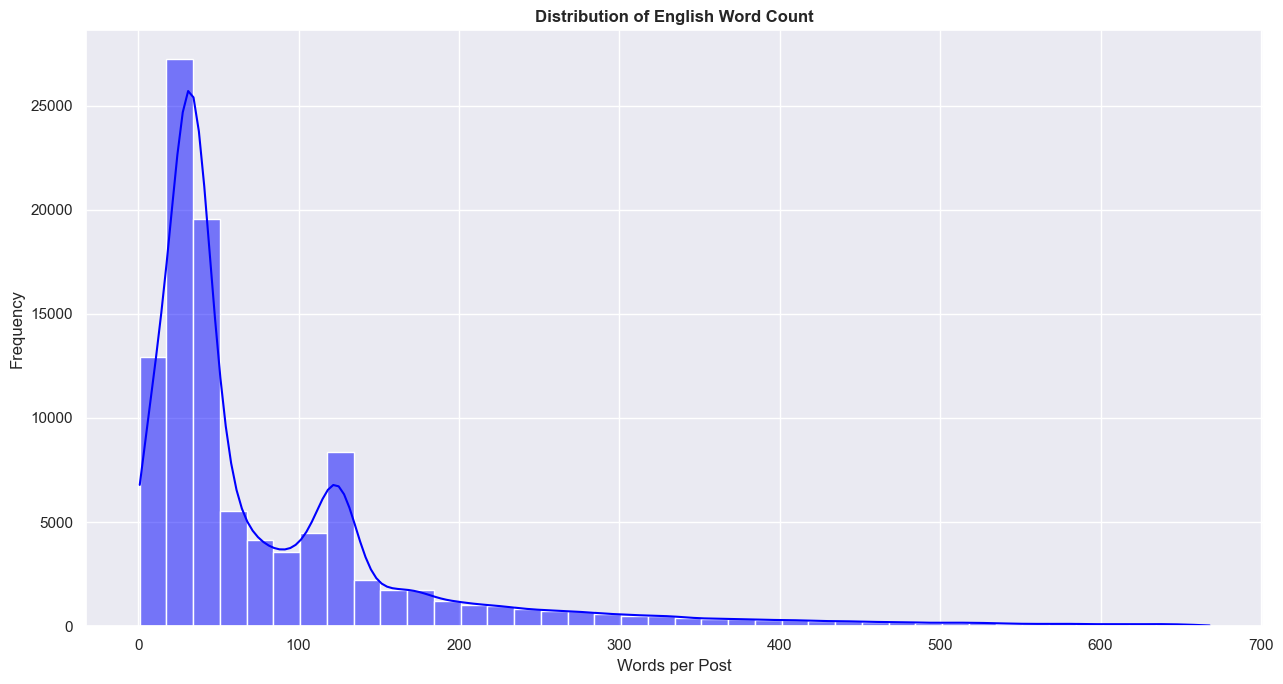

In [48]:
# Plot 4: Distribution of English Word Count

# Filter out the top 1% of extreme values for a clearer plot
upper_limit = data['english_word_count'].quantile(0.99)
subset = data[data['english_word_count'] <= upper_limit]

plt.figure(figsize=(13, 7))
sns.histplot(subset, x='english_word_count', bins=40, kde=True, color='blue')
plt.title('Distribution of English Word Count', fontweight='bold')
plt.xlabel('Words per Post')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

From the histogram above, the following were observed:

- The distribution of English word count is right-skewed. This shows that most mental health posts are relatively short while a smaller number are considerably longer.

- The majority of posts contain fewer than 100 words showing that individuals often express mental health experiences in concise messages rather than long.

- A few longer posts extend beyond this range representing more detailed reflections or personal stories which occur less frequently.

- The applied 99th percentile cap improves visibility of the core pattern while showing the overall trend in post length distribution.

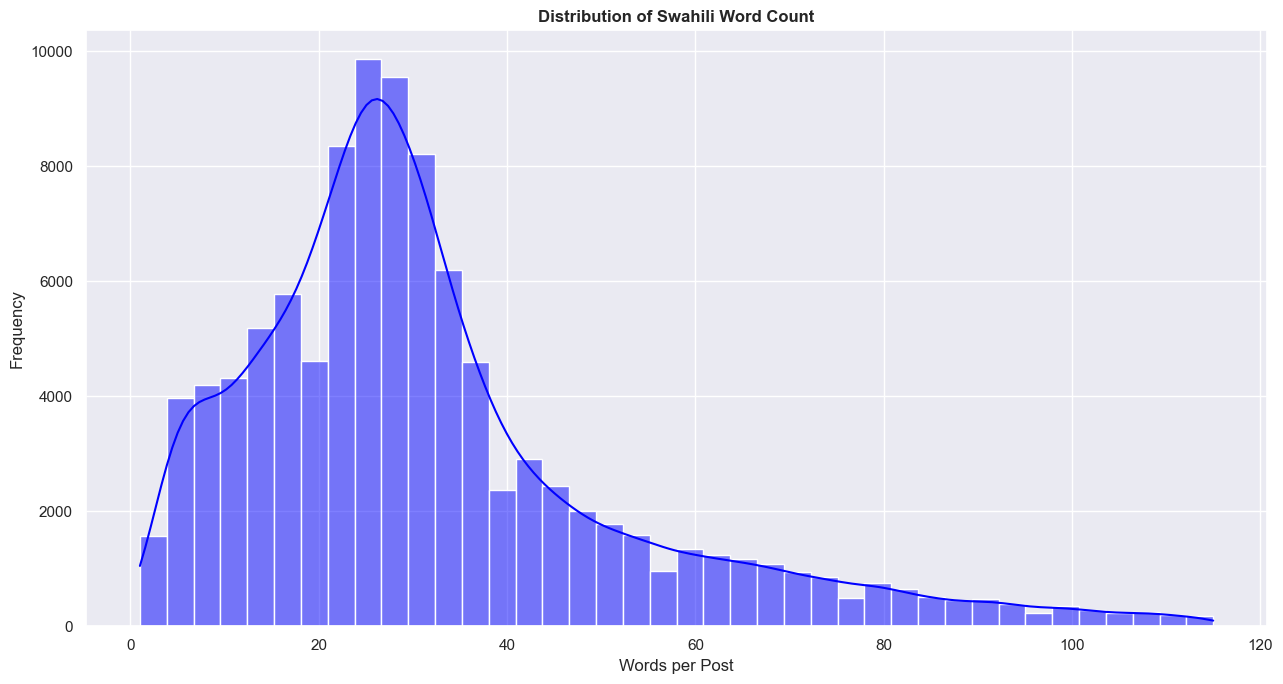

In [50]:
# Plot 5: Distribution of Swahili Word Count 

# Filter out the top 1% of extreme values for a clearer plot
upper_limit = data['swahili_word_count'].quantile(0.99)
subset = data[data['swahili_word_count'] <= upper_limit]

plt.figure(figsize=(13, 7))
sns.histplot(subset, x='swahili_word_count', bins=40, kde=True, color='blue')
plt.title('Distribution of Swahili Word Count', fontweight='bold')
plt.xlabel('Words per Post')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


From the histogram above, the following were observed:

- The distribution of Swahili word count is right-skewed with most posts containing 15 to 30 words.

- Shorter Swahili posts are more common while longer posts above 60 words occur less frequently.

- The pattern shows that Swahili expressions of mental health tend to be concise capturing emotions or experiences in fewer words.

- The distribution suggests that Swahili posts often use fewer words to express complete ideas. This shows natural differences in how the two languages are structured and written.

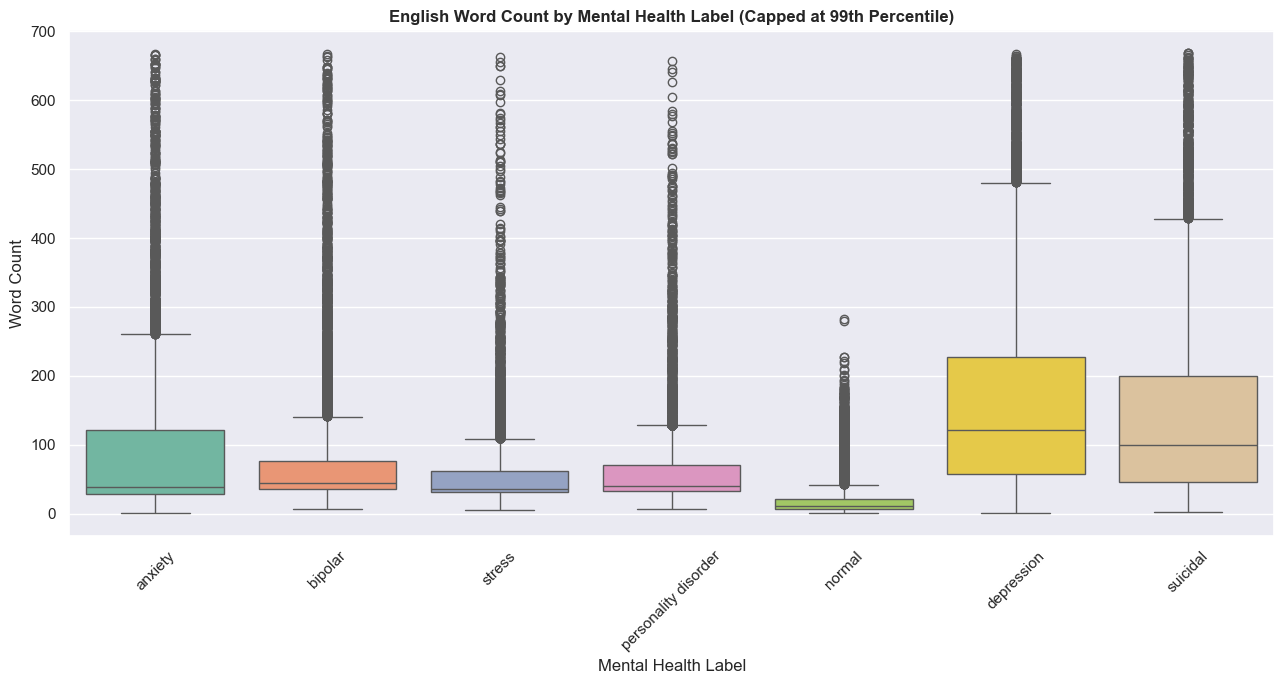

In [52]:
# Plot 6: English Word Count by Mental Health Label

# Extreme word counts capped for clearer visualization
upper_limit = data['english_word_count'].quantile(0.99)
subset = data[data['english_word_count'] <= upper_limit]

plt.figure(figsize=(13, 7))
sns.boxplot(data=subset, x='mental_health_label', y='english_word_count', palette='Set2')
plt.title('English Word Count by Mental Health Label (Capped at 99th Percentile)', fontweight='bold')
plt.xlabel('Mental Health Label')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The boxplot above shows that:

- Depression posts have the highest lengths with a median of about 110 words and an IQR roughly 60 to 220.

- Suicidal posts are also long with a median of about 90 words and an IQR roughly 50 to 200.

- Anxiety, bipolar, stress and personality disorder posts are shorter and more consistent with medians around 30 to 50 words and IQRs about 20 to 70.

- Normal posts are the shortest with a median around 15 to 25 words and an IQR about 10 to 35.

- There are numerous high end outliers of about 250 words that appear across labels. This shows a small set of unusually long and detailed posts.

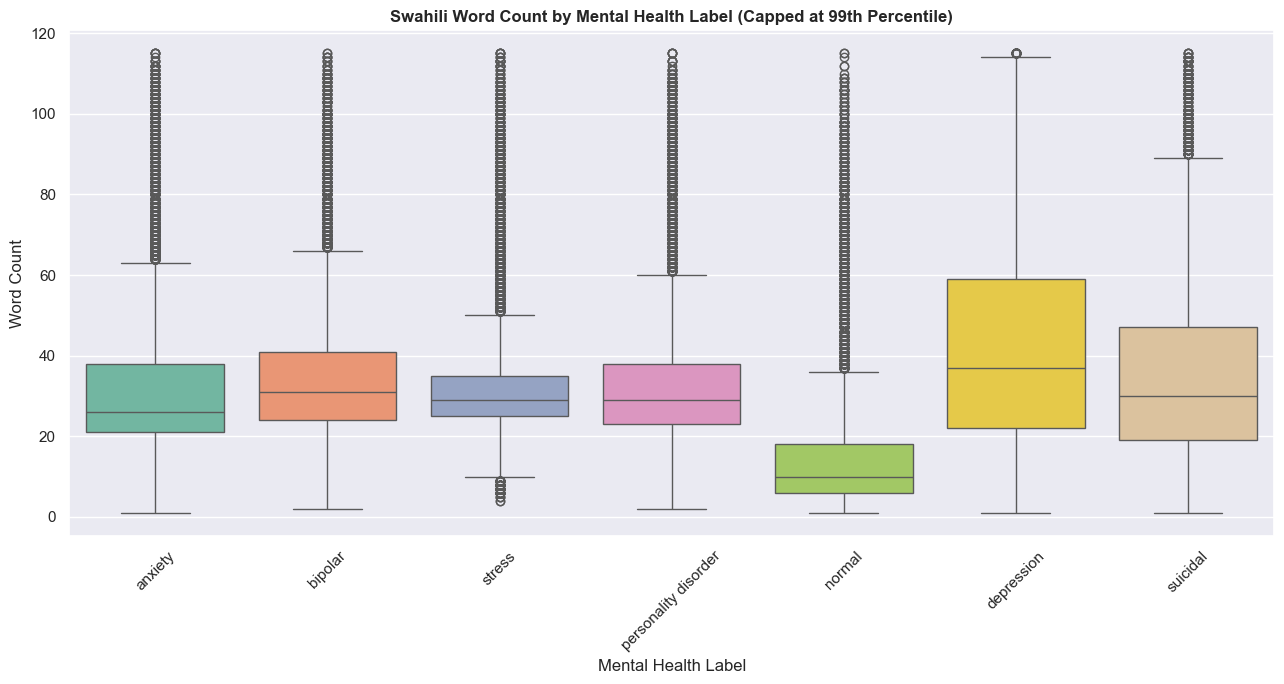

In [54]:
# Plot 7: Swahili Word Count by Mental Health Label

# Extreme word counts capped for clearer visualization
upper_limit = data['swahili_word_count'].quantile(0.99)
subset = data[data['swahili_word_count'] <= upper_limit]

plt.figure(figsize=(13, 7))
sns.boxplot(data=subset, x='mental_health_label', y='swahili_word_count', palette='Set2')
plt.title('Swahili Word Count by Mental Health Label (Capped at 99th Percentile)', fontweight='bold')
plt.xlabel('Mental Health Label')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the boxplot above, the following were observed:

- The distribution was capped at the 99th percentile to reduce the effect of extreme outliers and improve clarity.

- Depression and suicidal posts show the highest median word counts averaging at around 40 to 60 words with a wider IQR that shows greater variation in post length.

- Anxiety, bipolar and stress posts are shorter and more consistent with median values near 25 to 35 words.

- Normal posts have the lowest word counts, mostly below 20 words. This shows simpler and briefer expressions.

- Outliers are still present across categories. This shows that some users write unusually long posts regardless of condition.

- The findings show that Swahili posts are linked to more intense emotional states such as depression and suicidal tendencies. Ina ddition, the posts tend to be longer and more variable in length suggesting deeper or more detailed reflections.

From both English and Swahili boxplots, the following were observed:

- Posts written in Swahili are generally shorter with median word counts between 25 to 35 words. This is in comparison to English posts with 40 to 60 words.

- Both languages show a similar pattern across mental health labels. Depression and suicidal posts consistently have the longest lengths while normal posts are the briefest.

- Anxiety, bipolar and stress categories are relatively moderate in both languages showing balanced variability without extreme dispersion.

- Outliers appear across all categories and languages. This shows that some users produce significantly longer posts regardless of condition.

- The differences suggest that language structure and expression style influence post length. However, the emotional intensity of a condition remains a stronger factor in determining verbosity.

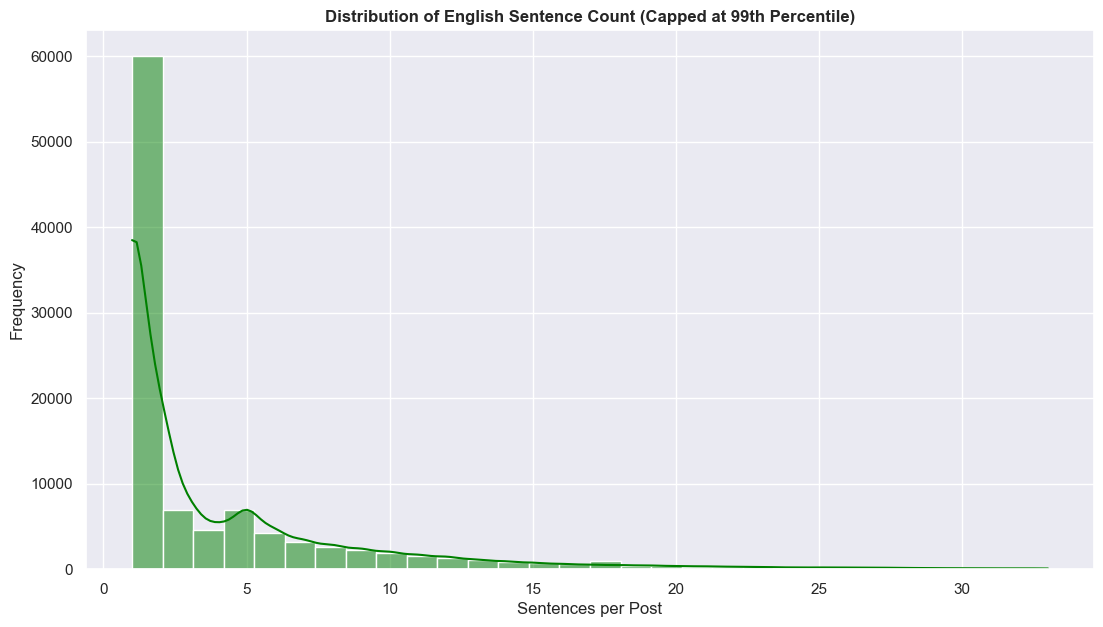

In [57]:
# Plot 8: Distribution of English Sentence Count

# Cap extreme outliers at the 99th percentile
sentence_cap = data['english_sentence_count'].quantile(0.99)
filtered_english = data[data['english_sentence_count'] <= sentence_cap]

plt.figure(figsize=(13,7))
sns.histplot(filtered_english['english_sentence_count'], bins=30, kde=True, color='green')
plt.title('Distribution of English Sentence Count (Capped at 99th Percentile)', fontweight='bold')
plt.xlabel('Sentences per Post')
plt.ylabel('Frequency')
plt.show()


From the histogram above, the following were observed:

- The distribution is right-skewed showing that most posts contain fewer sentences.

- The majority of English posts have 1 to 3 sentences with a steep drop beyond 5.

- Posts with more than 10 sentences are rare. This could mean that longer narratives are uncommon.

- The density curve confirms that users mostly write short and focused posts which is common for social media expression.

- This shows a tendency for concise communication where emotions or thoughts are conveyed briefly rather than through long paragraphs.

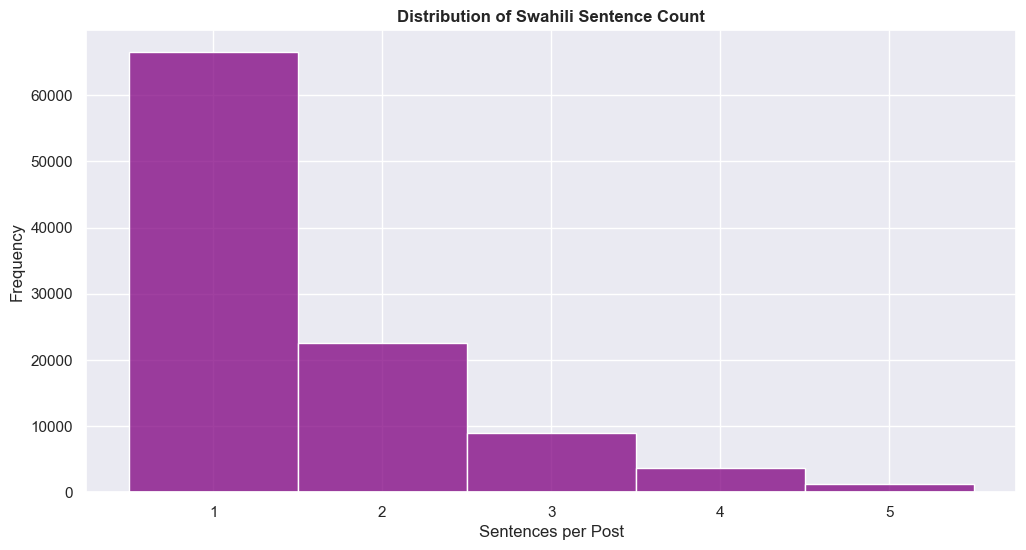

In [59]:
# Plot 9: Distribution of Swahili Sentence Count

# Cap extreme outliers at the 99th percentile
swahili_sentence_cap = data['swahili_sentence_count'].quantile(0.99)
filtered_swahili = data[data['swahili_sentence_count'] <= swahili_sentence_cap]

plt.figure(figsize=(12,6))
sns.histplot(filtered_swahili['swahili_sentence_count'], bins=range(1,7), color='purple', discrete=True)
plt.title('Distribution of Swahili Sentence Count', fontweight='bold')
plt.xlabel('Sentences per Post')
plt.ylabel('Frequency')
plt.show()


From the histogram above, the following were observed:

- The distribution is right-skewed showing that most Swahili posts contain very few sentences.

- A large majority of posts have only 1 to 2 sentences while posts exceeding 3 sentences are much less common.

- Posts with 4 to 5 sentences appear rarely. This shows that longer Swahili narratives are uncommon on the platform.

- This pattern suggests that Swahili users also prefer concise and direct communication expressing thoughts or emotions briefly rather than through lengthy text.

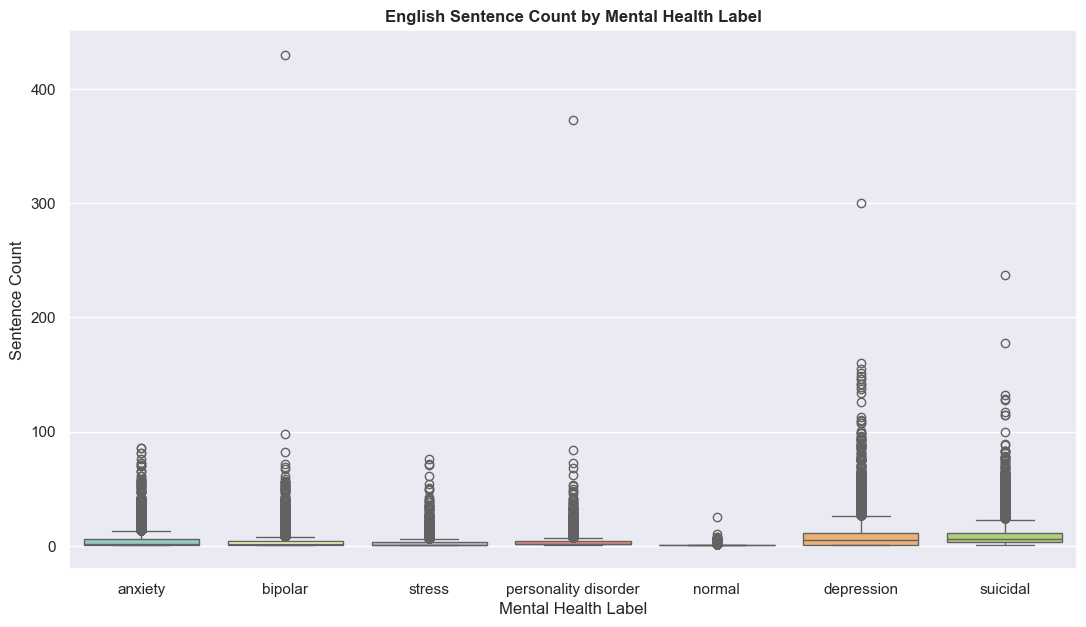

In [61]:
# Plot 10: English Sentence Count by Mental Health Label

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='mental_health_label', y='english_sentence_count', palette='Set3')
plt.title('English Sentence Count by Mental Health Label', fontweight='bold')
plt.xlabel('Mental Health Label')
plt.ylabel('Sentence Count')
plt.show()


The boxplot above shows the variation in sentence counts across different mental health categories among English posts:

- Most posts across all categories contain very few sentences with medians typically between 1 to 3 sentences. This shows short and concise user expressions.

- Depression and suicidal posts show slightly higher variability with some outliers extending above 100 sentences. This means that individuals expressing deeper distress may write longer narratives.

- Normal, stress and anxiety categories show shorter and more compact posts. This is consistent with quick social media communication styles.

- The presence of extreme outliers in categories like bipolar and personality disorder could show occasional long reflective posts or journal like entries.

- English posts related to mental health remain mostly brief with emotional or crisis related categories occasionally producing longer messages.

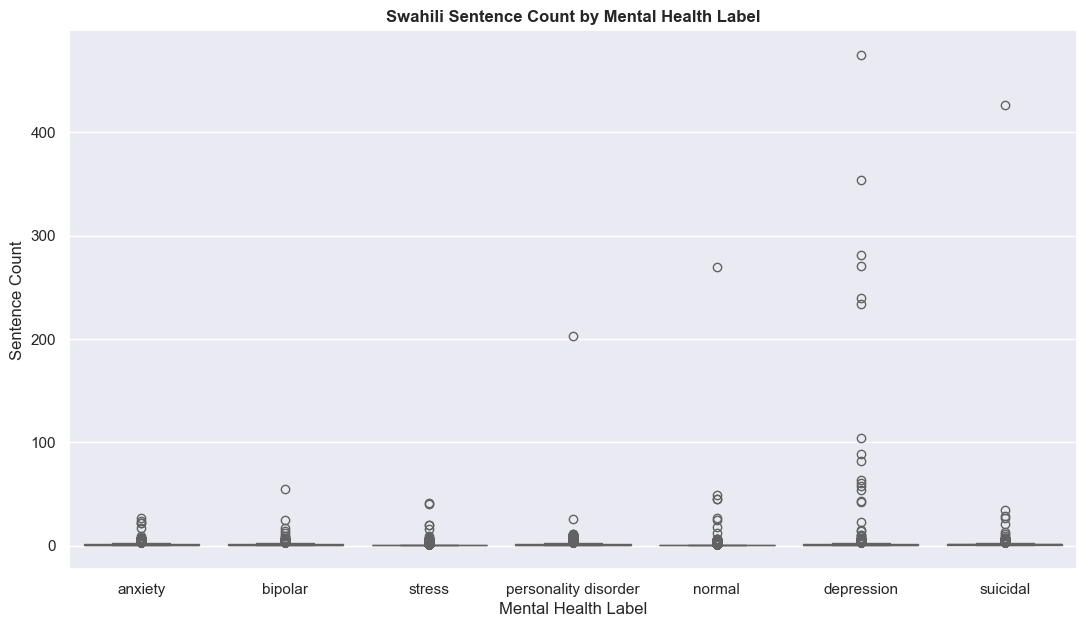

In [63]:
# Plot 11: Swahili Sentence Count by Mental Health Label

plt.figure(figsize=(13, 7))
sns.boxplot(data=data, x='mental_health_label', y='swahili_sentence_count', palette='Set3')
plt.title('Swahili Sentence Count by Mental Health Label', fontweight='bold')
plt.xlabel('Mental Health Label')
plt.ylabel('Sentence Count')
plt.show()


The boxplot above shows the variation in sentence counts across different mental health categories among Swahili posts:

- Most posts across all categories contain very few sentences with medians typically between 1 and 3. This shows a concise communication style.

- Depression and suicidal posts show slightly higher variation with occasional long narratives. This could mean that users expressing deeper distress tend to write more.

- Anxiety, stress and bipolar categories remain compact, having short and direct expressions. Normal and personality disorder posts are the shortest overall.

- There are a few extreme outliers above 200 to 400 sentences that likely represent copied or unusually extended content rather than typical posts.

- Swahili mental health posts are brief and emotion focused with longer posts appearing mainly in distress related categories. This shows that text length may rise with emotional intensity.

#### 2.3.7 Key Observations

- Across both English and Swahili posts, users generally communicate in short and concise messages with low word and sentence counts. English posts tend to be slightly longer and more varied while Swahili posts are more compact and consistent.

- Longer messages are more common in categories such as depression and suicidal. This means that emotional intensity often leads to extended and expressive posts. However, normal, anxiety and stress posts remain brief and direct, showing quick social media communication patterns.

- The analysis reveals that while conciseness dominates across all categories, post length can serve as an indirect signal of emotional depth and mental health distress. This is a valuable insight for text preprocessing and modeling.

## **3. Data Cleaning and Preprocessing**

The preprocessing step started with cleaning the swahili text column.This led to a lot of challenges due to the unavailability of a suitable lemmatization library.

We used a separate notebook for trial and error with the swahili text column which will be committed on our github repository  showing the different steps of preprocessing but we couldn't overcome the challenge of lemmatizing the swahili text column. 

The purpose of this project was to try to make our dataset more localized as they're more Swahili speakers than English speakers in Kenya, but since English is also a national language in our country using the english text column will suffice.

This section focuses on preparing the dataset for analysis by applying systematic data cleaning,and normalization 

The aim is to transform raw, unstructured text into a clean and structured format suitable for effective mental health classification.

These steps ensure data consistency, reduce noise and enhance the quality of features used for modeling.



### 3.1 Preprocessing  with English text

The steps include:

- Normalization: Involves  converting the text data into  a consistent format  by converting all the text data  to  lowercase.

- Cleaning: Removes URLs, @mentions and hashtags if any appear in the dataset. It expands contractions, normalizes repeated letters and strips special characters. In addition, it standardizes punctuation and whitespace.

- Tokenization: This involves breaking the texts into smaller words or phrases that the  model can understand.

- Stopword Removal: This involves removing words with no significant meaning.

- POS Tagging: It is short for part of speech and involves assigning each text a grammatical category like Noun, Verb and Adjective.

- Lemmatization: It reduces words to their base root or form.


### 3.1.1 Normalizing and Cleaning

* In this section we will both normalize and then clean the english text column.

* This step allows us to prepare raw, messy text data into a clean, uniform format that our  machine learning models can effectively process and analyze.

In [76]:
#his process improves model performance and accuracy by reducing noise, standardizing variations, and removing irrelevant information, making it easier for algorithms to understand the meaningful patterns in the data

In [77]:
#dropping the columns we don't need
data.drop(['english_length','swahili_length','english_word_count','english_sentence_count','english_char_count','swahili_word_count','swahili_sentence_count','swahili_char_count'],axis=1, inplace=True)
data.head()

,english_text,mental_health_label,swahili_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi..."
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak..."
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha..."
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka..."


* Our dataset for this section with just the english_text, mental_health_label and swahili_text column.

In [79]:
#changing the text to lower case
data['cleaned_text'] = data['english_text'].str.lower().str.strip()
data.head()

,english_text,mental_health_label,swahili_text,cleaned_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...","""my mind is a never-ending cycle of worry, and..."
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite the sun shining and birds singing outs...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...","i'm drowning in responsibilities, each one dem..."
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...","""my emotions shift like the wind, leaving me u..."
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...","i'm trapped in a whirlwind of thoughts, unable..."


In [80]:
#removing urls and  special characters if any 
data['cleaned_text'] = data['cleaned_text'].str.replace(r'http\S+|www\S+|@\w+|#\w+', '', regex=True)
data.head()


,english_text,mental_health_label,swahili_text,cleaned_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...","""my mind is a never-ending cycle of worry, and..."
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite the sun shining and birds singing outs...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...","i'm drowning in responsibilities, each one dem..."
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...","""my emotions shift like the wind, leaving me u..."
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...","i'm trapped in a whirlwind of thoughts, unable..."


### 3.1.2  Tokenization and Stopword removal

In this part we will create a function that:
1. Tokenize the text data
2. Remove stopwords in the text.
3. Remove singular words which are insignificant for our models.
4. Rejoin the tokenized data into one string.

In [83]:
# ensures the stopwords like i'm remain intact
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:'[a-z]+)?")

* We made use of **RegexpTokenizer** which is a tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [85]:
# creating an instance for stopwords
stopwords_list=set(stopwords.words('english'))
print(stopwords_list)


{'or', 'all', 'will', 'each', "he's", 'into', 'them', 'did', 'theirs', 'has', 'of', 'haven', 'once', 'wasn', 'how', 'doing', 'its', "she's", 'themselves', 'not', 'other', 'do', "i've", 'didn', "needn't", 'should', "hadn't", 'down', 'on', 'some', "wouldn't", 'then', 'been', 'where', 'nor', 'my', 'more', 'at', 'until', 'which', 'o', 'isn', 'few', 'll', 'why', 'ours', 'about', 'from', 'and', 'won', "you'll", 'because', "i'll", 'he', 'me', "isn't", "mustn't", 'm', 't', 'y', 'myself', "they'd", 'd', 'during', 'shan', "that'll", 'a', 'aren', 'no', 'there', 'below', "don't", 'his', "shan't", 'up', 'yours', 'be', "she'll", 'wouldn', 'whom', "i'd", 'him', 'those', 'hers', 'in', 'mightn', 'yourself', 'above', 'just', 'after', 'she', "she'd", 'is', 'i', "aren't", 'doesn', "it'll", 'these', "you'd", 'again', 'hadn', 'have', "he'll", 'needn', "didn't", "should've", 'their', 'if', 'ourselves', "they're", 'through', "you're", 'so', "they've", 'who', 'ma', 'don', 'to', 'you', 'they', "doesn't", 'now',

In [86]:
#we've combined tokenization and stopword removal.
def remove_stopwords(text):
    if not isinstance(text, str): # Ensure it's text
        return ""
    
    tokens = tokenizer.tokenize(text)#tokenize
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    cleaned_tokens= [word for word in filtered_tokens if len(word) > 1 ]#removes singular words
    
    return " ".join(cleaned_tokens)  # join back to text

In [87]:
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)
data.head()

,english_text,mental_health_label,swahili_text,cleaned_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",mind never ending cycle worry even simplest ta...
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite sun shining birds singing outside wind...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...",drowning responsibilities one demanding attent...
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...",emotions shift like wind leaving uncertain tru...
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",trapped whirlwind thoughts unable focus anythi...


* As we can see above the stopword **I'm** was tokenized and remained a singular word which allowed for our code to read the word as a stopword.

### 3.1.3 Removing Punctuation

* Removing punctuations from our text data followed after tokenization and stopword removal in order to ensure all stopwords were removed effectively since some of our stopwords contain puctuations such as **I'm**.

In [91]:
#removing punctuation-
data['cleaned_text'] = data['cleaned_text'].str.replace(r'[^A-Za-z\s]', '', regex=True)
data.head()

,english_text,mental_health_label,swahili_text,cleaned_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",mind never ending cycle worry even simplest ta...
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite sun shining birds singing outside wind...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...",drowning responsibilities one demanding attent...
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...",emotions shift like wind leaving uncertain tru...
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",trapped whirlwind thoughts unable focus anythi...


### 3.1.4 POS tagging and Lemmatization

* In this step  Pos taggging is done before lemmatization in order to find the correct base form of a word.This helps the machine to understand the structure and meaning of sentences by identifying the role of words and their relationships.

* Pos tagging was done using WordNet which involves first using a standard POS tagger to tag a sentence, then mapping the tagger's output to WordNet's four simplified part-of-speech categories which include nouns, verbs, adjectives, and adverbs.

In [95]:
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,  #Represents an Adjective
        'N': wordnet.NOUN, #Represents a Noun
        'V': wordnet.VERB, #Represents a Verb
        'R': wordnet.ADV   #Represents an Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [96]:

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word, get_pos(word)) for word in tokenizer.tokenize(text)])
    
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_text)
data.head()

,english_text,mental_health_label,swahili_text,cleaned_text,lemmatized_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",mind never ending cycle worry even simplest ta...,mind never end cycle worry even simplest task ...
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite sun shining birds singing outside wind...,despite sun shin bird sing outside window dept...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...",drowning responsibilities one demanding attent...,drown responsibility one demand attention yet ...
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...",emotions shift like wind leaving uncertain tru...,emotion shift like wind leave uncertain truly ...
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",trapped whirlwind thoughts unable focus anythi...,trap whirlwind thought unable focus anything m...


* As we can see above, words were reduced to proper words for example:
  1. Singing- sing
  2. Drowning- drown
  3. Leaving- leave
  4. Trapped- trap
----
This will further increase accuracy in our model.

All these steps allow for:
1. Cleaning and standardizing raw data which makes the data suitable for machine learning models by removing inconsistencies and irrelevant information.
2. Reduction of noise in the data.
3. Improved efficiency in the models by removing insignficant words.
4. Reduced Redundancy and ambiguity in our data by performing lemmatization.

### 3.2 Data Normalization and  Cleaning Overview

This step applied rule based normalization to remove noise and standardize surface form:
    
- Converted our texted data to lowercase

- Removed URLs, @mentions and hashtags if any.

- Dropped non-alphabetic symbols.

- Normalized whitespace and trim.

This resulted in readable and de-noised text ready for linguistic processing.

### 3.3 Text Preprocessing Overview

This step standardized tokens to reduce sparsity and improve generalization:

- Tokenized into words.

- Removed stopwords and very short tokens.
    
- Removed punctuations

- Lemmatized to base forms. For example ending to end.

This resulted in compact and cleaner token sequences.


## **4.1 Modeling**

In this section we  will make use of traditional models such as (Logistic regression, Naive Bayesian, SupportVector Machine, Random Forest) and advanced models such as RoBERTa( Robustly Optimized BERT Pretraining Approach), which is a transformer model. 

In [102]:
data.head()

,english_text,mental_health_label,swahili_text,cleaned_text,lemmatized_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",mind never ending cycle worry even simplest ta...,mind never end cycle worry even simplest task ...
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite sun shining birds singing outside wind...,despite sun shin bird sing outside window dept...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...",drowning responsibilities one demanding attent...,drown responsibility one demand attention yet ...
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...",emotions shift like wind leaving uncertain tru...,emotion shift like wind leave uncertain truly ...
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",trapped whirlwind thoughts unable focus anythi...,trap whirlwind thought unable focus anything m...


In [103]:

data.drop('cleaned_text', axis= 1, inplace= True)
data.head()

,english_text,mental_health_label,swahili_text,lemmatized_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",mind never end cycle worry even simplest task ...
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite sun shin bird sing outside window dept...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...",drown responsibility one demand attention yet ...
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...",emotion shift like wind leave uncertain truly ...
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",trap whirlwind thought unable focus anything m...


In [104]:
#renaming the  lemmatized column
data.rename(columns={'lemmatized_text': 'cleaned_text'}, inplace=True)
data.head()

,english_text,mental_health_label,swahili_text,cleaned_text
0,"""My mind is a never-ending cycle of worry, and...",anxiety,"""Akili yangu ni hali isiyobadilika ya wasiwasi...",mind never end cycle worry even simplest task ...
1,Despite the sun shining and birds singing outs...,bipolar,Licha ya jua kung'aa na ndege wakiimba nje ya ...,despite sun shin bird sing outside window dept...
2,"I'm drowning in responsibilities, each one dem...",stress,"Mimi ninalemewa na madaraka, kila mmoja akitak...",drown responsibility one demand attention yet ...
3,"""My emotions shift like the wind, leaving me u...",personality disorder,"""Hisia zangu hubadilika kama upepo, zikiniacha...",emotion shift like wind leave uncertain truly ...
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,"Nimenaswa na mawazo mengi sana, nashindwa kuka...",trap whirlwind thought unable focus anything m...


In [105]:
mentalhealth_data= data.drop(['english_text', 'swahili_text'], axis=1)
mentalhealth_data.head()

,mental_health_label,cleaned_text
0,anxiety,mind never end cycle worry even simplest task ...
1,bipolar,despite sun shin bird sing outside window dept...
2,stress,drown responsibility one demand attention yet ...
3,personality disorder,emotion shift like wind leave uncertain truly ...
4,anxiety,trap whirlwind thought unable focus anything m...


In [106]:
# downloading   modified data 
mentalhealth_data.to_csv("modified_mental_health.csv", index=False)
print(mentalhealth_data.shape)

(103481, 2)


* This above dataset will be used for deeplearning in separate notebook

### 4.1.1 Multi-class classification with Traditional models

The steps for multi-class modeling are as follows:

1. Defining X and Y Features.

2. Encoding the labels(Positive, Negative and Neutral)

3. Split the data.

4. Train the models with each model having a baseline model and then do hyperparamater tuning to find the best model.

5. Create a pipeline that trains and tests our data. The Pipeline contains TfidfVectorizer which is a vectorizer that converts our textual data to numeric data.

6. Evaluate the models using training accuracy,validation accuracy, F1 score and ROC.

7. Plotting the Accuracy score, F1 score, ROC and Confusion matrix.

8. Save the best performing model.

In [110]:
#checking for duplicates
mentalhealth_data.duplicated(subset=['cleaned_text']).any()

True

In [111]:
#removing duplicates
mentalhealth_data =  mentalhealth_data.drop_duplicates(subset=['cleaned_text'],keep='first')

In [112]:
#checking whether duplicates have been removed
mentalhealth_data.duplicated(subset=['cleaned_text']).any()

False

* All duplicates have been removed

In [114]:
mentalhealth_data.shape

(99840, 2)

* The dataset that will be used by the traditional models contains 99840 rows and two columns.

In [116]:
#checking for missing values
mentalhealth_data.isnull().sum()

mental_health_label    0
cleaned_text           0
dtype: int64

* There are no missing values

In [118]:
#encoding the labels

label_encoder = LabelEncoder()
mentalhealth_data['label'] = label_encoder.fit_transform(mentalhealth_data['mental_health_label'])
mentalhealth_data.head()

,mental_health_label,cleaned_text,label
0,anxiety,mind never end cycle worry even simplest task ...,0
1,bipolar,despite sun shin bird sing outside window dept...,1
2,stress,drown responsibility one demand attention yet ...,5
3,personality disorder,emotion shift like wind leave uncertain truly ...,4
4,anxiety,trap whirlwind thought unable focus anything m...,0


In [119]:
mentalhealth_data['label'].value_counts().sort_index()

label
0    16384
1    13623
2    15233
3    15354
4    13621
5    14949
6    10676
Name: count, dtype: int64

* The classes are fairly balanced with each class have more that 10,000 text data.

In [121]:
#define X and y features
X = mentalhealth_data['cleaned_text']
y = mentalhealth_data['label']

In [122]:
#Split the data into train, validation, and test
#70% training, 15% validation, 15% test

X_train,X_temp,y_train,y_temp = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split( X_temp,y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [123]:
#checking whether the training data has the same number of samples
X_train.shape, y_train.shape

((69888,), (69888,))

### 4.1.2 Training the  Models and Hyperparameter Tuning

In this section, the classifier models are trained with each having a baseline model and then perform hyperparameter tuning.

The classifier models include:
1. Logistic Regression

2. Naive bayes

3. LinearSvc

4. Random Forest

In [191]:
#  Let's pick our robot models and their magic settings!
# we refer to the code below as a robot since it is able to automate between different tasks

# First, we tell Python what robot models we want to try.
# Each robot learns in a different way!

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),  # a robot that guesses yes/no smartly
    'NaiveBayes': MultinomialNB(),                            # a robot that loves counting words
    'LinearSVC': LinearSVC(max_iter=2000) ,                                # a robot that draws a line
    'RandomForest':RandomForestClassifier(n_jobs=-1, random_state= 42)
}

#  Now, we give each robot a few "knobs" to turn — these are the *settings* we’ll test.
# We’ll try different numbers to see what makes them learn best!

params = {
    # For Logistic Regression robot:
    'LogisticRegression': {
        'tfidf__max_features': [30000, 50000],  # how many words to look at
        'model__C': [0.01,0.1, 1.0],         # how strong or soft the learning should be
        'model__class_weight': ['balanced']
    },

    #  For Naive Bayes robot:
    'NaiveBayes': {
        'tfidf__max_features': [50000],  # same word count choices
        'model__alpha': [0.5, 1.0, 2.0]            # how much to smooth (make learning less noisy)
    },

    #  For Linear SVC robot:
    'LinearSVC': {
        'tfidf__max_features': [50000],  # number of words to remember
        'model__C': [0.01,0.1, 1.0],          # controls how strict the robot’s line is
        'model__class_weight': ['balanced']
    },
    
    #for Randomforest robot: 
    'RandomForest': {
        'tfidf__max_features': [30000],      # number of words to remember
        'model__n_estimators': [200, 300],        #the number of trees in the forest
        'model__max_depth'   : [15, 20 , 25]    #how deep the tree can grow vertically
    }
}


#### 4.1.3 Creating a Pipeline

From the pipeline below, the following is possible:

1. Use F-IDF Vectorizer to convert the text data to numeric data which makes use of n-gram_range to capture the context and extract meaning from the text data. It returns a sparse matrix suitable for model training and evaluation.
   
2. Pass in each and every classifier model through a GridSearchCV.

3. Fit the different classifier models.

4. Save the best model of each classifier using joblib

5. Make predictions from the training and validation data.

6. Evaluate the different models using training and validation accuracy, test accuracy, F1score, precision and Recall.

7. Calculate the AUC which represents the probability that a model will rank the positive higher than the negative.


In [200]:
#  Train and test our robots (models)

# We keep all our results here
results = {}

# We go through each robot we made before (Logistic, Naive Bayes, SVC)
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Step 1: Make a pipeline that includes tfidf, smote  and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=90000,ngram_range=(1, 2))),
        ('model', model)
    ])

    # Step 2: Try many settings for each robot
    grid = GridSearchCV(
        pipeline,
        param_grid=params[name],
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    # Step 3: Train the model
    grid.fit(X_train, y_train)

    # Step 4: Get the best model
    best_model = grid.best_estimator_
   
    #Step 5: Save the best model to disk
    joblib.dump(best_model, f'best_model_{name}.pkl')

     # Step 6: Predict on train and validation data
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred= best_model.predict(X_test)

     # Step 7: Calculate Accuracy and F1
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
  
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred,average='macro')
    
    train_precision= precision_score(y_train, y_train_pred, average='macro')
    val_precision =  precision_score(y_val, y_val_pred, average='macro')
    test_precision=  precision_score(y_test, y_test_pred, average='macro')
    
    train_recall= recall_score(y_train, y_train_pred, average='macro')
    val_recall =  recall_score(y_val, y_val_pred, average='macro')
    test_recall=  recall_score(y_test, y_test_pred, average='macro')
    

     # Step 8: Calculate AUC (only if model gives probabilities)
    try:
         y_train_prob = best_model.predict_proba(X_train)
         y_val_prob = best_model.predict_proba(X_val)
         y_test_prob = best_model.predict_proba(X_test)
         train_auc = roc_auc_score(pd.get_dummies(y_train), y_train_prob, multi_class='ovr')
         val_auc = roc_auc_score(pd.get_dummies(y_val), y_val_prob, multi_class='ovr')
         test_auc = roc_auc_score(pd.get_dummies(y_test), y_test_prob, multi_class='ovr')
         
    except:
         train_auc = np.nan
         val_auc = np.nan

     # Step 9: Save results
    results[name] = {
         'model': best_model,
         'train_acc': train_acc,
         'val_acc': val_acc,
         'test_acc': test_acc,
         'train_f1': train_f1,
         'val_f1': val_f1,
         'test_f1': test_f1,
         'train_precision': train_precision,
         'val_precision': val_precision,
         'test_precision': test_precision,
         'train_recall': train_recall,
         'val_recall': val_recall,
         'test_recall': test_recall,


        
         'train_auc': train_auc,
         'val_auc': val_auc,
         'test_auc': test_auc,
         'y_val_pred': y_val_pred,
         'y_val_true': y_val
    }

    # Step 10: Print summary
    print(f"Best settings: {grid.best_params_}")
    print(f"Train Accuracy: {train_acc:.3f} | Val Accuracy: {val_acc:.3f}| Test Accuracy:{test_acc:.3f}")
    print(f"Train F1: {train_f1:.3f} | Val F1: {val_f1:.3f}| Test F1:{test_f1:.3f}")
    print(f"Train Precision: {train_precision:.3f} | Val Precision: {val_precision:.3f}| Test precision:{test_precision:.3f}")
    print(f"Train Recall: {train_recall:.3f} | Val Recall: {val_recall:.3f}| Test recall:{test_recall:.3f}")
    print(f"Train AUC: {train_auc:.3f} | Val AUC: {val_auc:.3f}| Test AUC: {test_auc:.3f}" )
    
    


Training LogisticRegression...
Best settings: {'model__C': 1.0, 'model__class_weight': 'balanced', 'tfidf__max_features': 30000}
Train Accuracy: 0.919 | Val Accuracy: 0.868| Test Accuracy:0.859
Train F1: 0.917 | Val F1: 0.864| Test F1:0.855
Train Precision: 0.918 | Val Precision: 0.867| Test precision:0.859
Train Recall: 0.918 | Val Recall: 0.863| Test recall:0.854
Train AUC: 0.994 | Val AUC: 0.984| Test AUC: 0.982

Training NaiveBayes...
Best settings: {'model__alpha': 0.5, 'tfidf__max_features': 50000}
Train Accuracy: 0.844 | Val Accuracy: 0.790| Test Accuracy:0.789
Train F1: 0.852 | Val F1: 0.796| Test F1:0.795
Train Precision: 0.884 | Val Precision: 0.842| Test precision:0.840
Train Recall: 0.839 | Val Recall: 0.780| Test recall:0.778
Train AUC: 0.976 | Val AUC: 0.961| Test AUC: 0.960

Training LinearSVC...
Best settings: {'model__C': 0.1, 'model__class_weight': 'balanced', 'tfidf__max_features': 50000}
Train Accuracy: 0.913 | Val Accuracy: 0.867| Test Accuracy:0.862
Train F1: 0.9

* The best performing traditional models are Logistic Regression and Linearsvc with logistic regression being the slightly better model.

* Logistic regression has a:
  1. Validation accuracy of **86.8%**
  2. Validation F1 of **86.4%**
  3. Validation precison of **86.7%**
  4. Validation recall of **86.3%**
----
* Linearsvc has a:
  1. Validation accuracy of **86.7%**
  2. Validation F1 of **86.3%**
  3. Validation precison of **86.7%**
  4. Validation recall of **86.2%**

* Our best model in logistic regression  has a  test accuracy of **85.9**. The model has following parameters **model__C': 1.0** **'model__class_weight': 'balanced'**, **'tfidf__max_features': 30000**

In [209]:
def plot_accuracy_per_model(results):
    """
    Plots train vs validation accuracy for each model individually.
    """
    for model_name, metrics in results.items():
        plt.figure(figsize=(5,3))
        
        # get train and val accuracy
        train_acc = metrics['train_acc']
        val_acc = metrics['val_acc']
        
        # plot them
        plt.plot(['Train', 'Validation'], [train_acc, val_acc],
                 color='orange', marker='o', label='Accuracy')
        plt.plot(['Train', 'Validation'], [val_acc, val_acc],
                 color='blue', marker='o', label='Validation Accuracy')  # just to show both colors
        plt.title(f"{model_name} - Accuracy")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1)
        plt.legend(['Train (Orange)', 'Validation (Blue)'])
        plt.grid(True)
        plt.show()

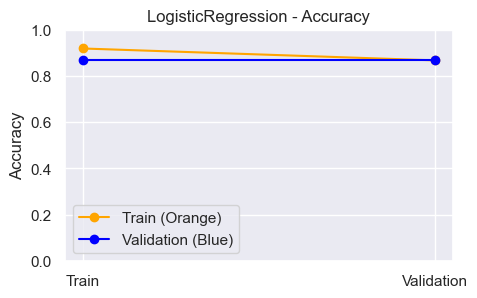

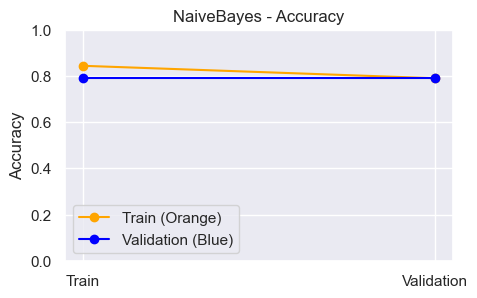

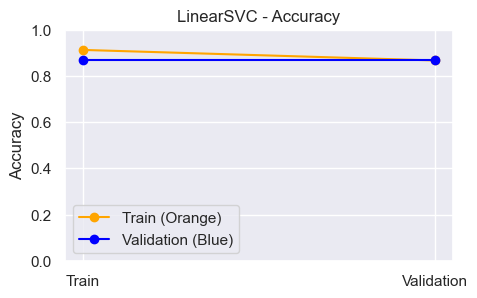

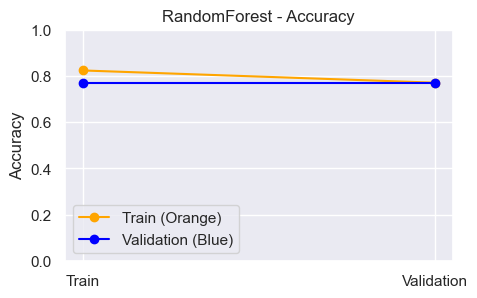

In [211]:
plot_accuracy_per_model(results)

#### Key Observations
* In both the logistic Regression, Naive bayes, LinearSvc and Random Forest have the training and validation accuracy overlapping. These models have a slight drop from training to validation accuracy.

* All these models had a good validation accuracy but logistic regression was slightly better than the rest with a validation accuracy of **86.8%**. The rest followed closely behind with Naive bayes having a validation accuracy of **79.0%**, LinearSvc having a validation accuracy of **86.7%**, and Random Forest having a validation accuracy of **77.1%**.

* The weakest model was the Random Forest model but the model is stable since it still has a low drop from training to validation accuracy.

In [214]:
def plot_f1_per_model(results):
    """
    Plots train vs validation F1 score for each model individually.
    """
    for model_name, metrics in results.items():
        plt.figure(figsize=(5,3))
        
        # get train and val F1
        train_f1 = metrics['train_f1']
        val_f1 = metrics['val_f1']
        
        # plot them
        plt.plot(['Train', 'Validation'], [train_f1, val_f1],
                 color='orange', marker='o', label='Train F1')
        plt.plot(['Train', 'Validation'], [val_f1, val_f1],
                 color='blue', marker='o', label='Validation F1')  # just to show both colors
        plt.title(f"{model_name} - F1 Score")
        plt.ylabel("F1 Score")
        plt.ylim(0, 1)
        plt.legend(['Train (Orange)', 'Validation (Blue)'])
        plt.grid(True)
        plt.show()

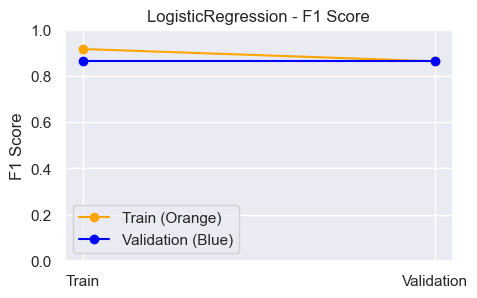

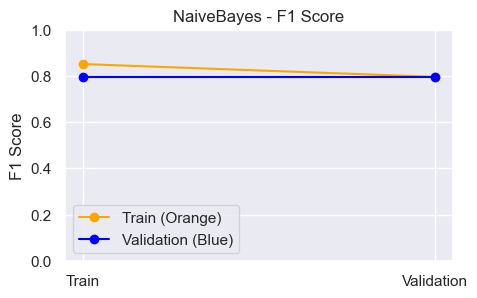

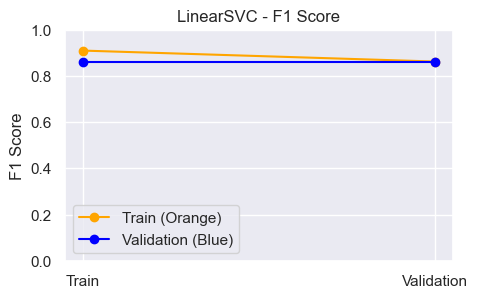

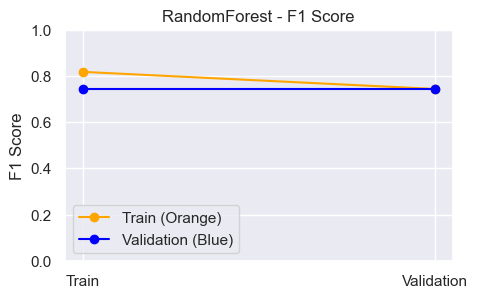

In [216]:
plot_f1_per_model(results)

#### Key Observations
* Same as the accuracy score graph all the models have a good F1 score. The training and validation F1 in all the models overlap.

* All these models have a good validation F1 but logistic regression was slightly better than the rest with a validation F1 of **86.4%**. The rest followed closely behind with Naive bayes having a validation accuracy of **79.6%**, LinearSvc having a validation F1  of **86.3%**, and Random Forest having a validation F1 of **74.4%**.

In [219]:
def plot_roc_curves(results):
    """
    Draws ROC curves for all models that support probability outputs.
    """
    for name, data in results.items():
        model = data['model']
        y_true = data['y_val_true']
        
        # Some models (like SVC) may not have predict_proba
        try:
            y_prob = model.predict_proba(X_val)
        except:
            print(f"Skipping {name} (no probability output).")
            continue

        classes = np.unique(y_true)

        # If only 2 classes (binary case)
        if len(classes) == 2:
            fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, color='blue', label=f'{name} (AUC = {auc(fpr, tpr):.3f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title(f'ROC Curve - {name}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid(True)
            plt.show()

        # If more than 2 classes (multi-class)
        else:
            y_true_bin = label_binarize(y_true, classes=classes)
            plt.figure(figsize=(6, 5))
            for i, cls in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
                plt.plot(fpr, tpr, label=f'{name} - {cls} (AUC={auc(fpr, tpr):.3f})')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title(f'Multi-Class ROC Curves - {name}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.grid(True)
            plt.show()

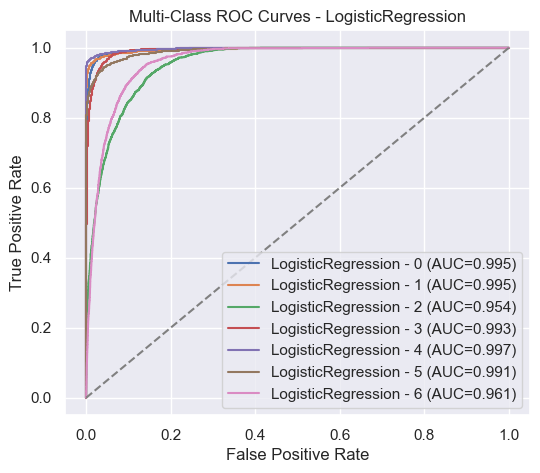

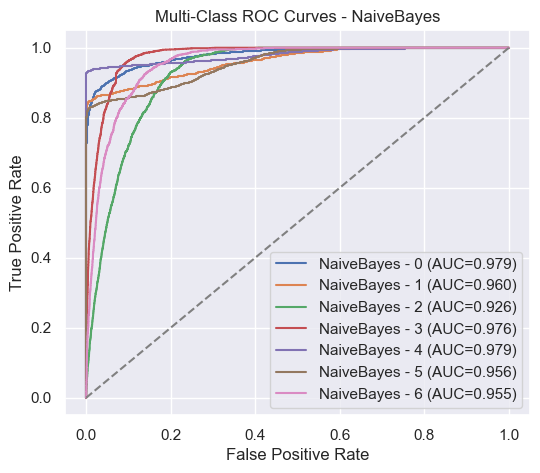

Skipping LinearSVC (no probability output).


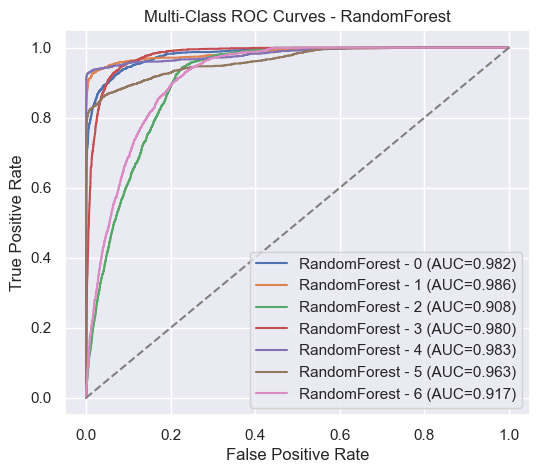

In [221]:
plot_roc_curves(results)

### Key observations
* In logistic Regression 5 classes seem to be clustered together with two remaining classes also close together thus further supporting that logistic regression has a better ROC curve. The five classes are clustered together to the furthest point in the  top left corner compared to Naive Bayes and Random Forest.

* Naive bayes has some of its classes clustered together in the top left corner but the classes don't overlap as good as the logistic regression.

In [224]:
def plot_confusion_matrices(results):
    for name, data in results.items():
        y_true = data['y_val_true']
        y_pred = data['y_val_pred']
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

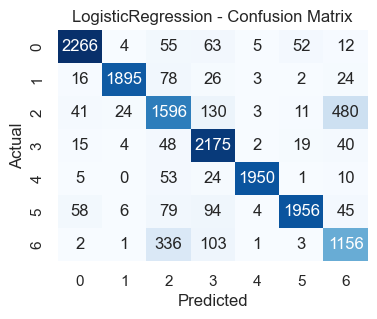

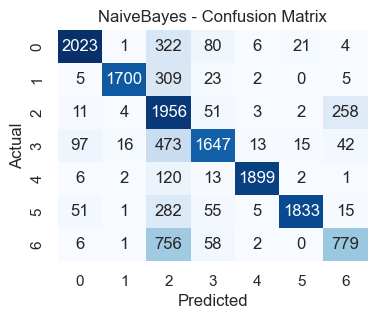

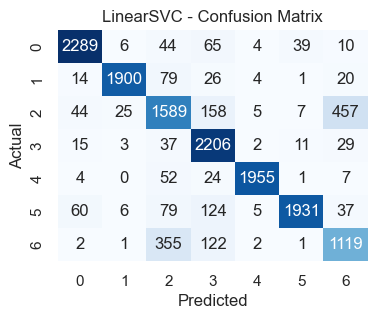

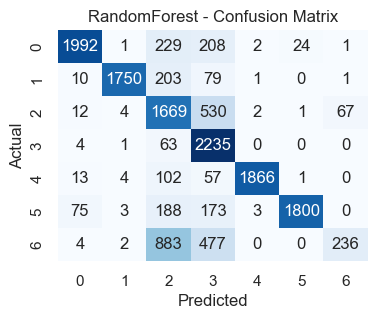

In [226]:
plot_confusion_matrices(results)

### Key Observations.
* All the models have a high true positive rate as observed by the highlighted diagonal line.